# Demo 3b: Compute on Horizontal Sections

In [1]:
%matplotlib inline

# Import OceanSpy
import oceanspy as ospy

# Additional packages
import matplotlib.pyplot as plt
import numpy             as np

# Import the OceanDataset
od = ospy.open_oceandataset.get_started()

# For this notebook we will focus on one snapshot in the top 100m of the water column
clean_od = od.subsample.cutout(ZRange=[0, -100], timeRange='2007-09-01', dropAxes=['time'])

Opening [Getting Started with OceanSpy]:
[A small cutout from EGshelfIIseas2km_ASR.].


/home/idies/miniconda3/lib/python3.7/site-packages/dask/array/blockwise.py:204: UserWarning: The da.atop function has moved to da.blockwise
  warnings.warn("The da.atop function has moved to da.blockwise")


Cutting out the oceandataset.


## Brunt–Väisälä frequency
$\huge N^2 = -\frac{g}{\rho_0}\frac{\partial\sigma_0}{\partial z}$  

Backend functions:

* `compute.potential_density_anomaly`

* `compute.gradient`

* `compute.weighted_mean`


Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
Computing Brunt-Väisälä Frequency using the following parameters: {'rho0': 1027, 'g': 9.81}.
Computing gradient.
Computing weighted averages.


/home/idies/miniconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)
/home/idies/miniconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


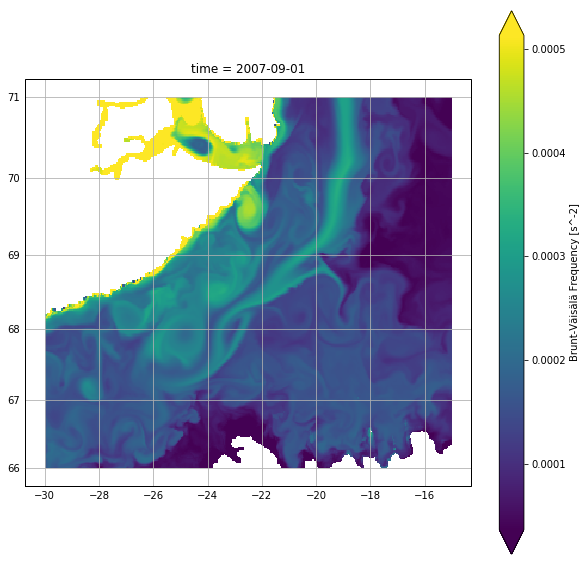

In [2]:
# Compute N2
od = clean_od.compute.Brunt_Vaisala_frequency()

# Plot 
fig = plt.figure(figsize=(10,10))
ax  = od.plot.horizontal_section(varName='N2', meanAxes=['Z'], robust=True)

## Vertical component of relative vorticity
$\huge \zeta = \hat{\mathbf{k}}\cdot\left(\nabla\times\overline{u}\right)$  

Backend functions:

* `compute.curl`

* `compute.weighted_mean`



Computing vertical component of relative vorticity.
Computing curl.


/home/idies/miniconda3/lib/python3.7/site-packages/dask/compatibility.py:93: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/idies/miniconda3/lib/python3.7/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


Maximum error: 1.62E-16 s^-1
Computing weighted averages.


/home/idies/miniconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/idies/miniconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)


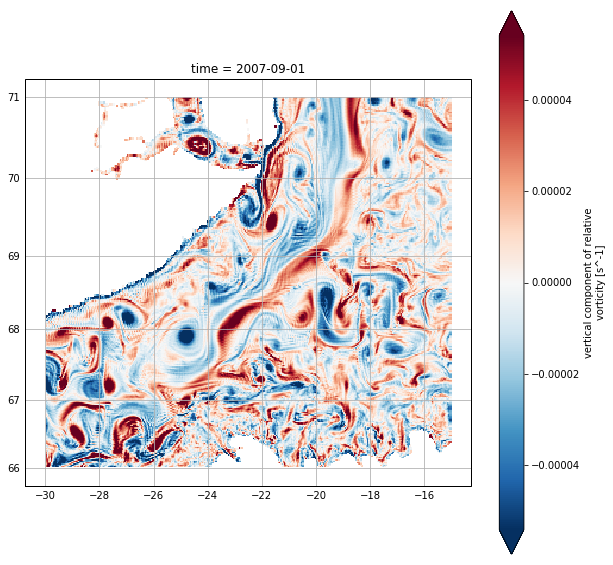

In [3]:
# Rename relative vorticity computed by the model
ds = clean_od.dataset.rename(momVort3='momVort3_model')
od = ospy.OceanDataset(ds)

# Compute the relative vorticity and rename
ds = ospy.compute.vertical_relative_vorticity(od)
od = od.merge_into_oceandataset(ds['momVort3'].rename('momVort3_OceanSpy'))

# Compute difference
diff = (od.dataset['momVort3_OceanSpy'] - od.dataset['momVort3_model']).rename('momVort3_diff')
print('Maximum error: {:.2E} s^-1'.format(np.fabs(diff).max().values))

# Plot 
fig = plt.figure(figsize=(10,10))
_   = od.plot.horizontal_section(varName='momVort3_OceanSpy', meanAxes=['Z'], robust=True)

## Ertel Potential vorticity
$\huge Q = (f + \zeta)\frac{N^2}{g} +
            \frac{\left(\mathbf{\zeta_h}+e\hat{\mathbf{y}}\right)\cdot\nabla_h\rho}{\rho_0}$  

Backend functions:

* `compute.relative_vorticity`

* `compute.relative_gradient`

* `compute.relative_curl`

* `compute.potential_density_anomaly`

* `compute.Brunt_Vaisala_frequency`

* `compute.weighted_mean`

Computing relative vorticity
Computing curl.
Computing gradient.
Computing gradient.
Computing gradient.
Computing gradient.
Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
Computing Brunt-Väisälä Frequency using the following parameters: {'rho0': 1027, 'g': 9.81}.
Computing gradient.
Computing Ertel potential vorticity using the following parameters: {'rho0': 1027, 'g': 9.81, 'omega': 7.292123516990375e-05}.
Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
Computing gradient.
Computing weighted averages.


/home/idies/miniconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)
/home/idies/miniconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


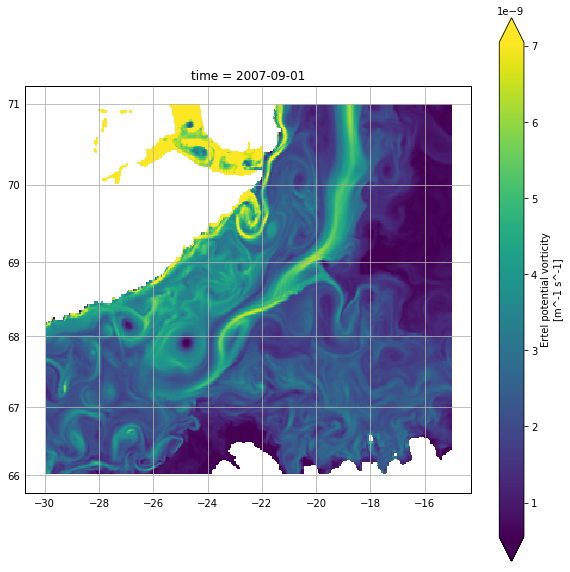

In [4]:
# Compute Ertel PV
od = od.compute.Ertel_potential_vorticity(full=True)

# Plot 
fig = plt.figure(figsize=(10,10))
_   = od.plot.horizontal_section(varName='Ertel_PV', meanAxes=['Z'], robust=True)